In [1]:
# Final Project for CS521
# Created By: Yuxiao Wu, Jisun Lee
# Created on: 10/31/2021
# Topic: House Price Predictor

In [39]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import precision_score
import seaborn as sns
import PySimpleGUI as sg

In [3]:
# import the data set
URL = 'https://raw.githubusercontent.com/bursteinalan/Data-Sets/master/Housing/House%20Prediction%20Data.csv'
r = requests.get(URL, allow_redirects = True)
decoded_content = r.content.decode('utf-8')
decoded_content = StringIO(decoded_content)
df = pd.read_csv(decoded_content, sep = ',')

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


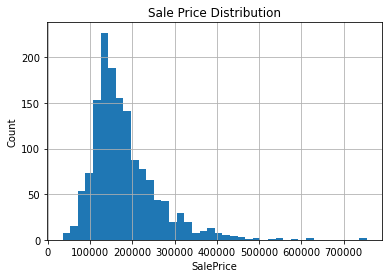

In [5]:
# Some Data Exploration
# plot SalePrice in a histogram to see how the SalePirce are distributed in our dataset. 
df.SalePrice.hist(bins = 40)
plt.title("Sale Price Distribution")
plt.xlabel('SalePrice')
plt.ylabel('Count')
plt.show()

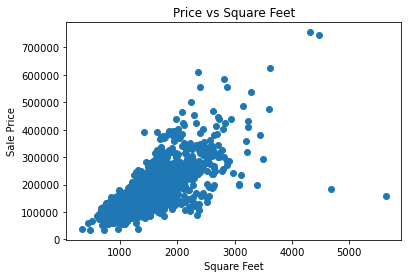

In [6]:
# Using scatter plot to see how the SalePrice related with the total Living Area
plt.scatter(df.GrLivArea,df.SalePrice)
plt.title("Price vs Square Feet")
plt.xlabel('Square Feet')
plt.ylabel('Sale Price')
plt.show()

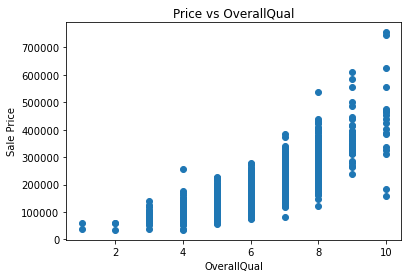

In [7]:
# Using scatter plot to see how the SalePrice related with the Overall Quality scale(1-10)
plt.scatter(df.OverallQual,df.SalePrice)
plt.title("Price vs OverallQual")
plt.xlabel('OverallQual')
plt.ylabel('Sale Price')
plt.show()

Text(0, 0.5, 'Count')

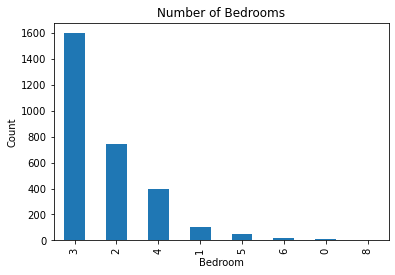

In [8]:
# See how many bedrooms are most common
df.BedroomAbvGr.value_counts().plot(kind ='bar')
plt.title("Number of Bedrooms")
plt.xlabel('Bedroom')
plt.ylabel('Count')

Text(0, 0.5, 'Sale Price')

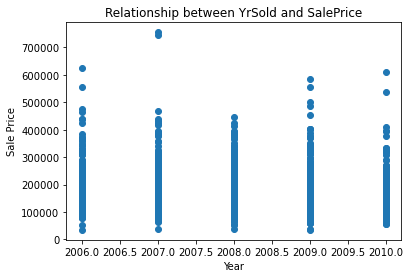

In [9]:
plt.scatter(df.YrSold,df.SalePrice)
plt.title("Relationship between YrSold and SalePrice")
plt.xlabel('Year')
plt.ylabel('Sale Price')

In [10]:
# Because SalePrice is our target attribute, drop all rows that SalePrice is Null
df = df[df.SalePrice.notnull()]

# Continue looking for missing data for other columns, columns with mutiple missing values are 
# unusable and drop the column with many missing values
null_column = df.isnull().sum().sort_values(ascending=False)
print(null_column[null_column > 0])
null_value = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','FireplaceQu','LotFrontage',
              'GarageYrBlt','GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2',
              'BsmtExposure','BsmtQual','BsmtCond','BsmtFinType1','MasVnrArea','MasVnrType',
              'Electrical']
df = df.drop(null_value,axis=1)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


In [11]:
# We found that many columns have non-numeric values that can not use for linear regression 
# So we want to convert some categorical data to numerical data
quality_order = ['Po','Fa', 'TA','Gd','Ex']
df.ExterQual.replace(quality_order,[0,1,2,3,4], inplace=True)
df.ExterCond.replace(quality_order,[0,1,2,3,4], inplace=True)
df.HeatingQC.replace(quality_order,[0,1,2,3,4], inplace=True)
df.KitchenQual.replace(quality_order,[0,1,2,3,4], inplace=True)

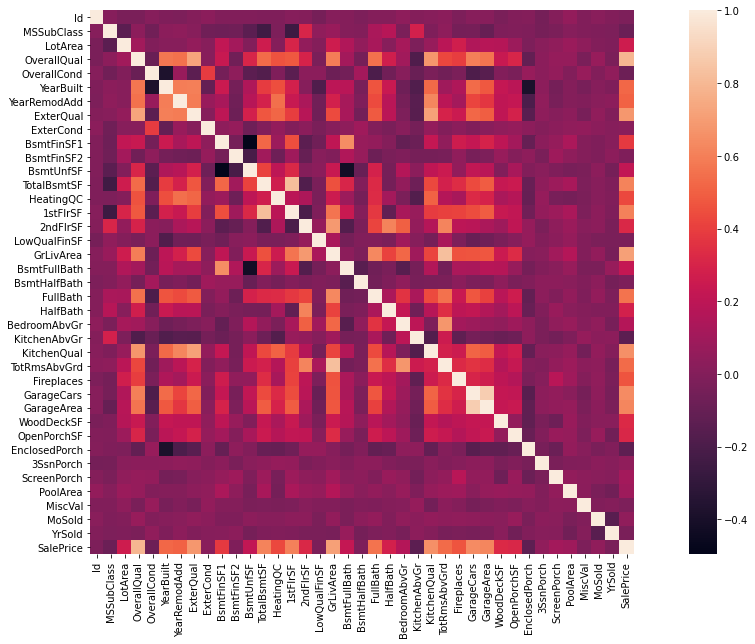

In [12]:
# Now Find the correlation between each varibale and the SalePrice
coorelation = df.corr()
f, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(coorelation,  square=True);

In [13]:
# we want to chose correlation variable greatter than 0.5 to perfrom the linear regression. 
price_corr = coorelation['SalePrice']
price_corr = price_corr.sort_values(ascending=False)
price_corr[abs(price_corr > 0.5)]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
ExterQual       0.682639
KitchenQual     0.659600
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [52]:
# Split the train and test data
df_X = df[['GrLivArea','OverallQual','ExterQual','KitchenQual','GarageCars','GarageArea',
           'TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
df_Y = df['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(df_X,df_Y,test_size = 0.2,random_state = 2)

# fit the linear model and test the score
reg = linear_model.LinearRegression() 
reg.fit(x_train, y_train)
test_score = reg.score(x_test,y_test)
coef_arr = reg.coef_
print('coefficient = ', coef_arr)
print('model test score = ', test_score)

coefficient =  [ 4.86554410e+01  1.38101717e+04  1.50770437e+04  1.35293890e+04
  1.16560517e+04  8.10532285e+00  2.52511657e+01 -6.34571773e+03
  6.72186734e+02  2.25020906e+02  7.67565603e+01]
model test score =  0.8391619774105572


In [56]:
# compare different regression model
# 1. Normal Linear
lin_pred = reg.predict(x_test)
mse_lin = mean_squared_error(lin_pred,y_test)
r2_lin = r2_score(lin_pred,y_test)

# 2. Lasso
las = linear_model.Lasso(alpha = 0.1)
las.fit(x_train, y_train)
las_pred = las.predict(x_test)
mse_Las = mean_squared_error(las_pred,y_test)
r2_Las = r2_score(las_pred,y_test)

# 3. Ridge
rid = linear_model.Ridge(alpha = 0.5)
rid.fit(x_train, y_train)
rid_pred = rid.predict(x_test)
mse_rid = mean_squared_error(rid_pred,y_test)
r2_rid = r2_score(rid_pred,y_test)

# 4. ElasticNet
ela = linear_model.ElasticNet(alpha = 0.1)
ela.fit(x_train, y_train)
ela_pred = ela.predict(x_test)
mse_ela = mean_squared_error(ela_pred,y_test)
r2_ela = r2_score(ela_pred,y_test)

print("------Mean Squared Error------")
print("Normal Linear Regression: ", mse_lin)
print("Lasso Regression: ", mse_Las)
print("Ridge Regression: ", mse_rid)
print("ElasticNet Regression: ", mse_ela)
print("------R-Squared Value------")
print("Normal Linear Regression: ", r2_lin)
print("Lasso Regression: ", r2_Las)
print("Ridge Regression: ", r2_rid)
print("ElasticNet Regression: ", r2_ela)

------Mean Squared Error------
Normal Linear Regression:  1065112062.5082631
Lasso Regression:  1065108853.3695242
Ridge Regression:  1064945038.4021134
ElasticNet Regression:  1056316593.534198
------R-Squared Value------
Normal Linear Regression:  0.7851854227567412
Lasso Regression:  0.7851853529345899
Ridge Regression:  0.7851762198404226
ElasticNet Regression:  0.7831063094076793


In [16]:
predict_price = reg.predict([[1800,7,2,2,2,484,1501,2,6,1959,1997]])
print('predicted price = ', predict_price)

predicted price =  [203564.41443822]


In [17]:
# Create simple User Interface for people to predict house price
layout = [      [sg.Text("Enter total living area above ground(ft^2): ",size=(30,1)),
                sg.InputText(key="a",size=(10,1))],      
                [sg.Text("Select Overall quality(1-10): ",size=(30,1)),
                sg.Combo([1,2,3,4,5,6,7,8,9,10],key="b",default_value="1",size=(10,1))],
                [sg.Text("Select Overall quality on exterior(0-4): ",size=(30,1)),
                sg.Combo([0,1,2,3,4],key="c",default_value="0",size=(10,1))],
                [sg.Text("Select Overall quality for Kitchen(0-4): ",size=(30,1)),
                sg.Combo([0,1,2,3,4],key="d",default_value="0",size=(10,1))],
                [sg.Text("Enter Number of Grage cars: ",size=(30,1)),
                sg.InputText(key="e",size=(10,1))],
                [sg.Text("Enter Grage Area(ft^2): ",size=(30,1)),
                sg.InputText(key="f",size=(10,1))],
                [sg.Text("Enter total Basement Area(ft^2): ",size=(30,1)),
                sg.InputText(key="g",size=(10,1))],
                [sg.Text("Enter Number of Bathroom: ",size=(30,1)),
                sg.InputText(key="h",size=(10,1))],
                [sg.Text("Enter total number of room above ground: ",size=(30,1)),
                sg.InputText(key="i",size=(10,1))],
                [sg.Text("Enter Year house Built: ",size=(30,1)),
                sg.InputText(key="j",size=(10,1))],
                [sg.Text("Enter Year house Remodeled: ",size=(30,1)),
                sg.InputText(key="k",size=(10,1))],
                [sg.Button("Calculate Price",size=(15,1)),sg.Button("Reset",size=(15,1))]
         ]
window = sg.Window("House Price predicator",layout)

In [18]:
while True:
        event,values = window.read()
        if event == sg.WINDOW_CLOSED:
           break
        if event == "Calculate Price":
           
           price = reg.predict([[values['a'],values['b'],values['c'],values['d'],values['e'],
                                 values['f'],values['g'],values['h'],values['i'],values['j'],values['k']]])
           price = "The Estimate Sale Price for your house is \n" + str(int(price)) + " Dollars" 
        
           sg.popup(price,title= "result")
        if event == "Reset":
           window["a"].update("")
           window["b"].update("")
           window["c"].update("")
           window["d"].update("")
           window["e"].update("")
           window["f"].update("")
           window["g"].update("")
           window["h"].update("")
           window["i"].update("")
           window["j"].update("")
           window["k"].update("")
                                                                    

window.close()